### Convolution Operation Breakdown


In [14]:
import numpy as np
import matplotlib.pyplot as plt

<b>Explanation:</b>
Input Image
𝐼<br>
I: Defined as a 6x6 numpy array representing grayscale pixel values.<br>
Filter
𝐾<br>
K: The vertical edge detection filter is also defined as a 3x3 numpy array.


In [15]:
# Define the input image (6x6 grayscale)
I = np.array([
    [50, 40, 30, 20, 10, 0],
    [55, 45, 35, 25, 15, 5],
    [60, 50, 40, 30, 20, 10],
    [65, 55, 45, 35, 25, 15],
    [70, 60, 50, 40, 30, 20],
    [75, 65, 55, 45, 35, 25]
], dtype=np.float32)

# Define the vertical edge detection filter (3x3)
K = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

Convolution Function (convolve):<br>
Iterates over each pixel in the input image 
𝐼
I.
Extracts the region of interest (ROI) corresponding to the filter size.<br>
Computes the element-wise multiplication between the ROI and the filter <br>
𝐾
K, and sums up the results to get the corresponding output pixel.

In [16]:
# Function to perform convolution operation
def convolve(image, kernel):
    image_height, image_width = image.shape
    kernel_size = kernel.shape[0]
    pad = kernel_size // 2  # Padding to handle borders

    # Initialize output feature map
    output = np.zeros_like(image)

    # Perform convolution
    for i in range(pad, image_height - pad):
        for j in range(pad, image_width - pad):
            # Extract the region of interest (ROI) from the image
            roi = image[i-pad:i+pad+1, j-pad:j+pad+1]
            # Apply the convolution operation
            output[i, j] = np.sum(roi * kernel)

    return output


In [17]:

# Perform convolution on the input image
output = convolve(I, K)

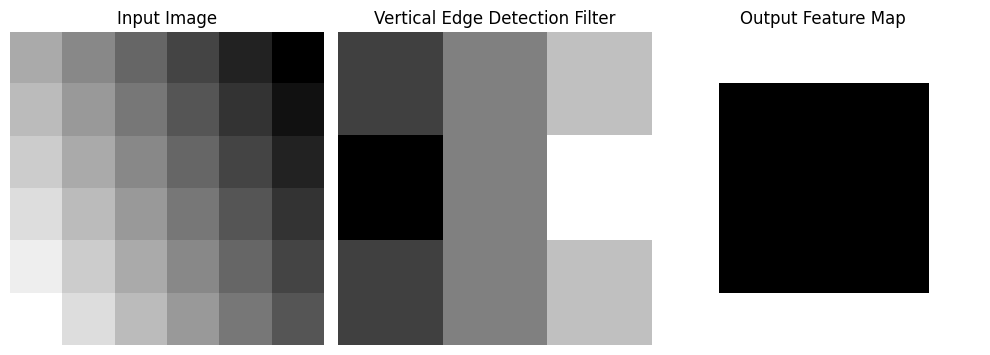

In [18]:
# Plotting the images
plt.figure(figsize=(10, 6))

# Plot Input Image
plt.subplot(1, 3, 1)
plt.imshow(I, cmap='gray')
plt.title('Input Image')
plt.axis('off')

# Plot Filter (Kernel)
plt.subplot(1, 3, 2)
plt.imshow(K, cmap='gray')
plt.title('Vertical Edge Detection Filter')
plt.axis('off')

# Plot Output Feature Map
plt.subplot(1, 3, 3)
plt.imshow(output, cmap='gray')
plt.title('Output Feature Map')
plt.axis('off')

plt.tight_layout()
plt.show()

Convolution Operation for RGB Images
For RGB images, each pixel has three color channels (Red, Green, Blue). If 
𝐼
I represents an RGB image, and 
𝐾
K is a filter, the convolution operation is applied separately to each channel. Here's the modified mathematical formulation:

In [19]:

# Define the input RGB image (6x6x3)
I_rgb = np.array([
    [[50, 40, 30], [20, 10, 0], [55, 45, 35], [25, 15, 5], [60, 50, 40], [30, 20, 10]],
    [[65, 55, 45], [35, 25, 15], [70, 60, 50], [40, 30, 20], [75, 65, 55], [45, 35, 25]],
    [[80, 70, 60], [50, 40, 30], [85, 75, 65], [55, 45, 35], [90, 80, 70], [60, 50, 40]],
    [[95, 85, 75], [65, 55, 45], [100, 90, 80], [70, 60, 50], [105, 95, 85], [75, 65, 55]],
    [[110, 100, 90], [80, 70, 60], [115, 105, 95], [85, 75, 65], [120, 110, 100], [90, 80, 70]],
    [[125, 115, 105], [95, 85, 75], [130, 120, 110], [100, 90, 80], [135, 125, 115], [105, 95, 85]]
], dtype=np.float32)

In [20]:
# Function to perform convolution operation on RGB image
def convolve_rgb(image, kernel):
    image_height, image_width, num_channels = image.shape
    kernel_size, _, _ = kernel.shape
    pad = kernel_size // 2  # Padding to handle borders

    # Initialize output feature map
    output = np.zeros((image_height - 2 * pad, image_width - 2 * pad, num_channels))

    # Perform convolution
    for i in range(pad, image_height - pad):
        for j in range(pad, image_width - pad):
            for c in range(num_channels):
                # Extract the region of interest (ROI) from the image
                roi = image[i-pad:i+pad+1, j-pad:j+pad+1, c]
                # Apply the convolution operation
                output[i-pad, j-pad, c] = np.sum(roi * kernel[:, :, c])

    return output

(-0.5, 2.5, 2.5, -0.5)

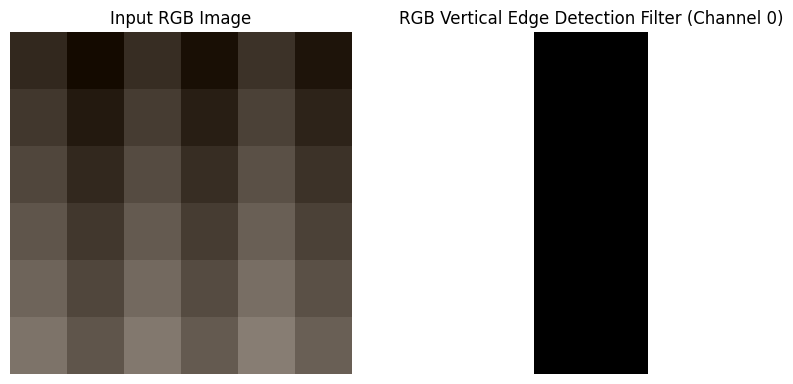

In [21]:

# Perform convolution on the input RGB image
output_rgb = convolve_rgb(I_rgb, K_rgb)

# Plotting the images
plt.figure(figsize=(15, 5))

# Plot Input RGB Image
plt.subplot(1, 3, 1)
plt.imshow(I_rgb.astype(np.uint8))
plt.title('Input RGB Image')
plt.axis('off')

# Plot Filter (Kernel) for the first channel
plt.subplot(1, 3, 2)
plt.imshow(K_rgb[:, :, 0], cmap='gray')
plt.title('RGB Vertical Edge Detection Filter (Channel 0)')
plt.axis('off')